In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 데이터 구성하기

In [2]:
df_raw=pd.read_csv("/Users/lee/Week3/체질검사.csv",engine="python",encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


## 1.변수간의 경향성 파악 - 그래프 분석

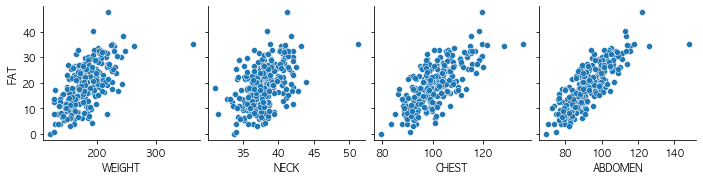

In [3]:
#산점도 행렬:목표변수와 설명변수 지정, kind="scatter"|"reg"
sns.pairplot(df_raw,y_vars="FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"],diag_kind=None)

## 2.변수간의 경향성 파악 = 상관관계 분석

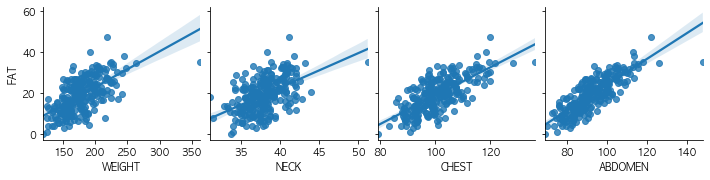

In [4]:
#회귀 적합선 추가 : Kind="reg"
sns.pairplot(df_raw,y_vars="FAT",x_vars=["WEIGHT","NECK","CHEST","ABDOMEN"],diag_kind=None,kind="reg")

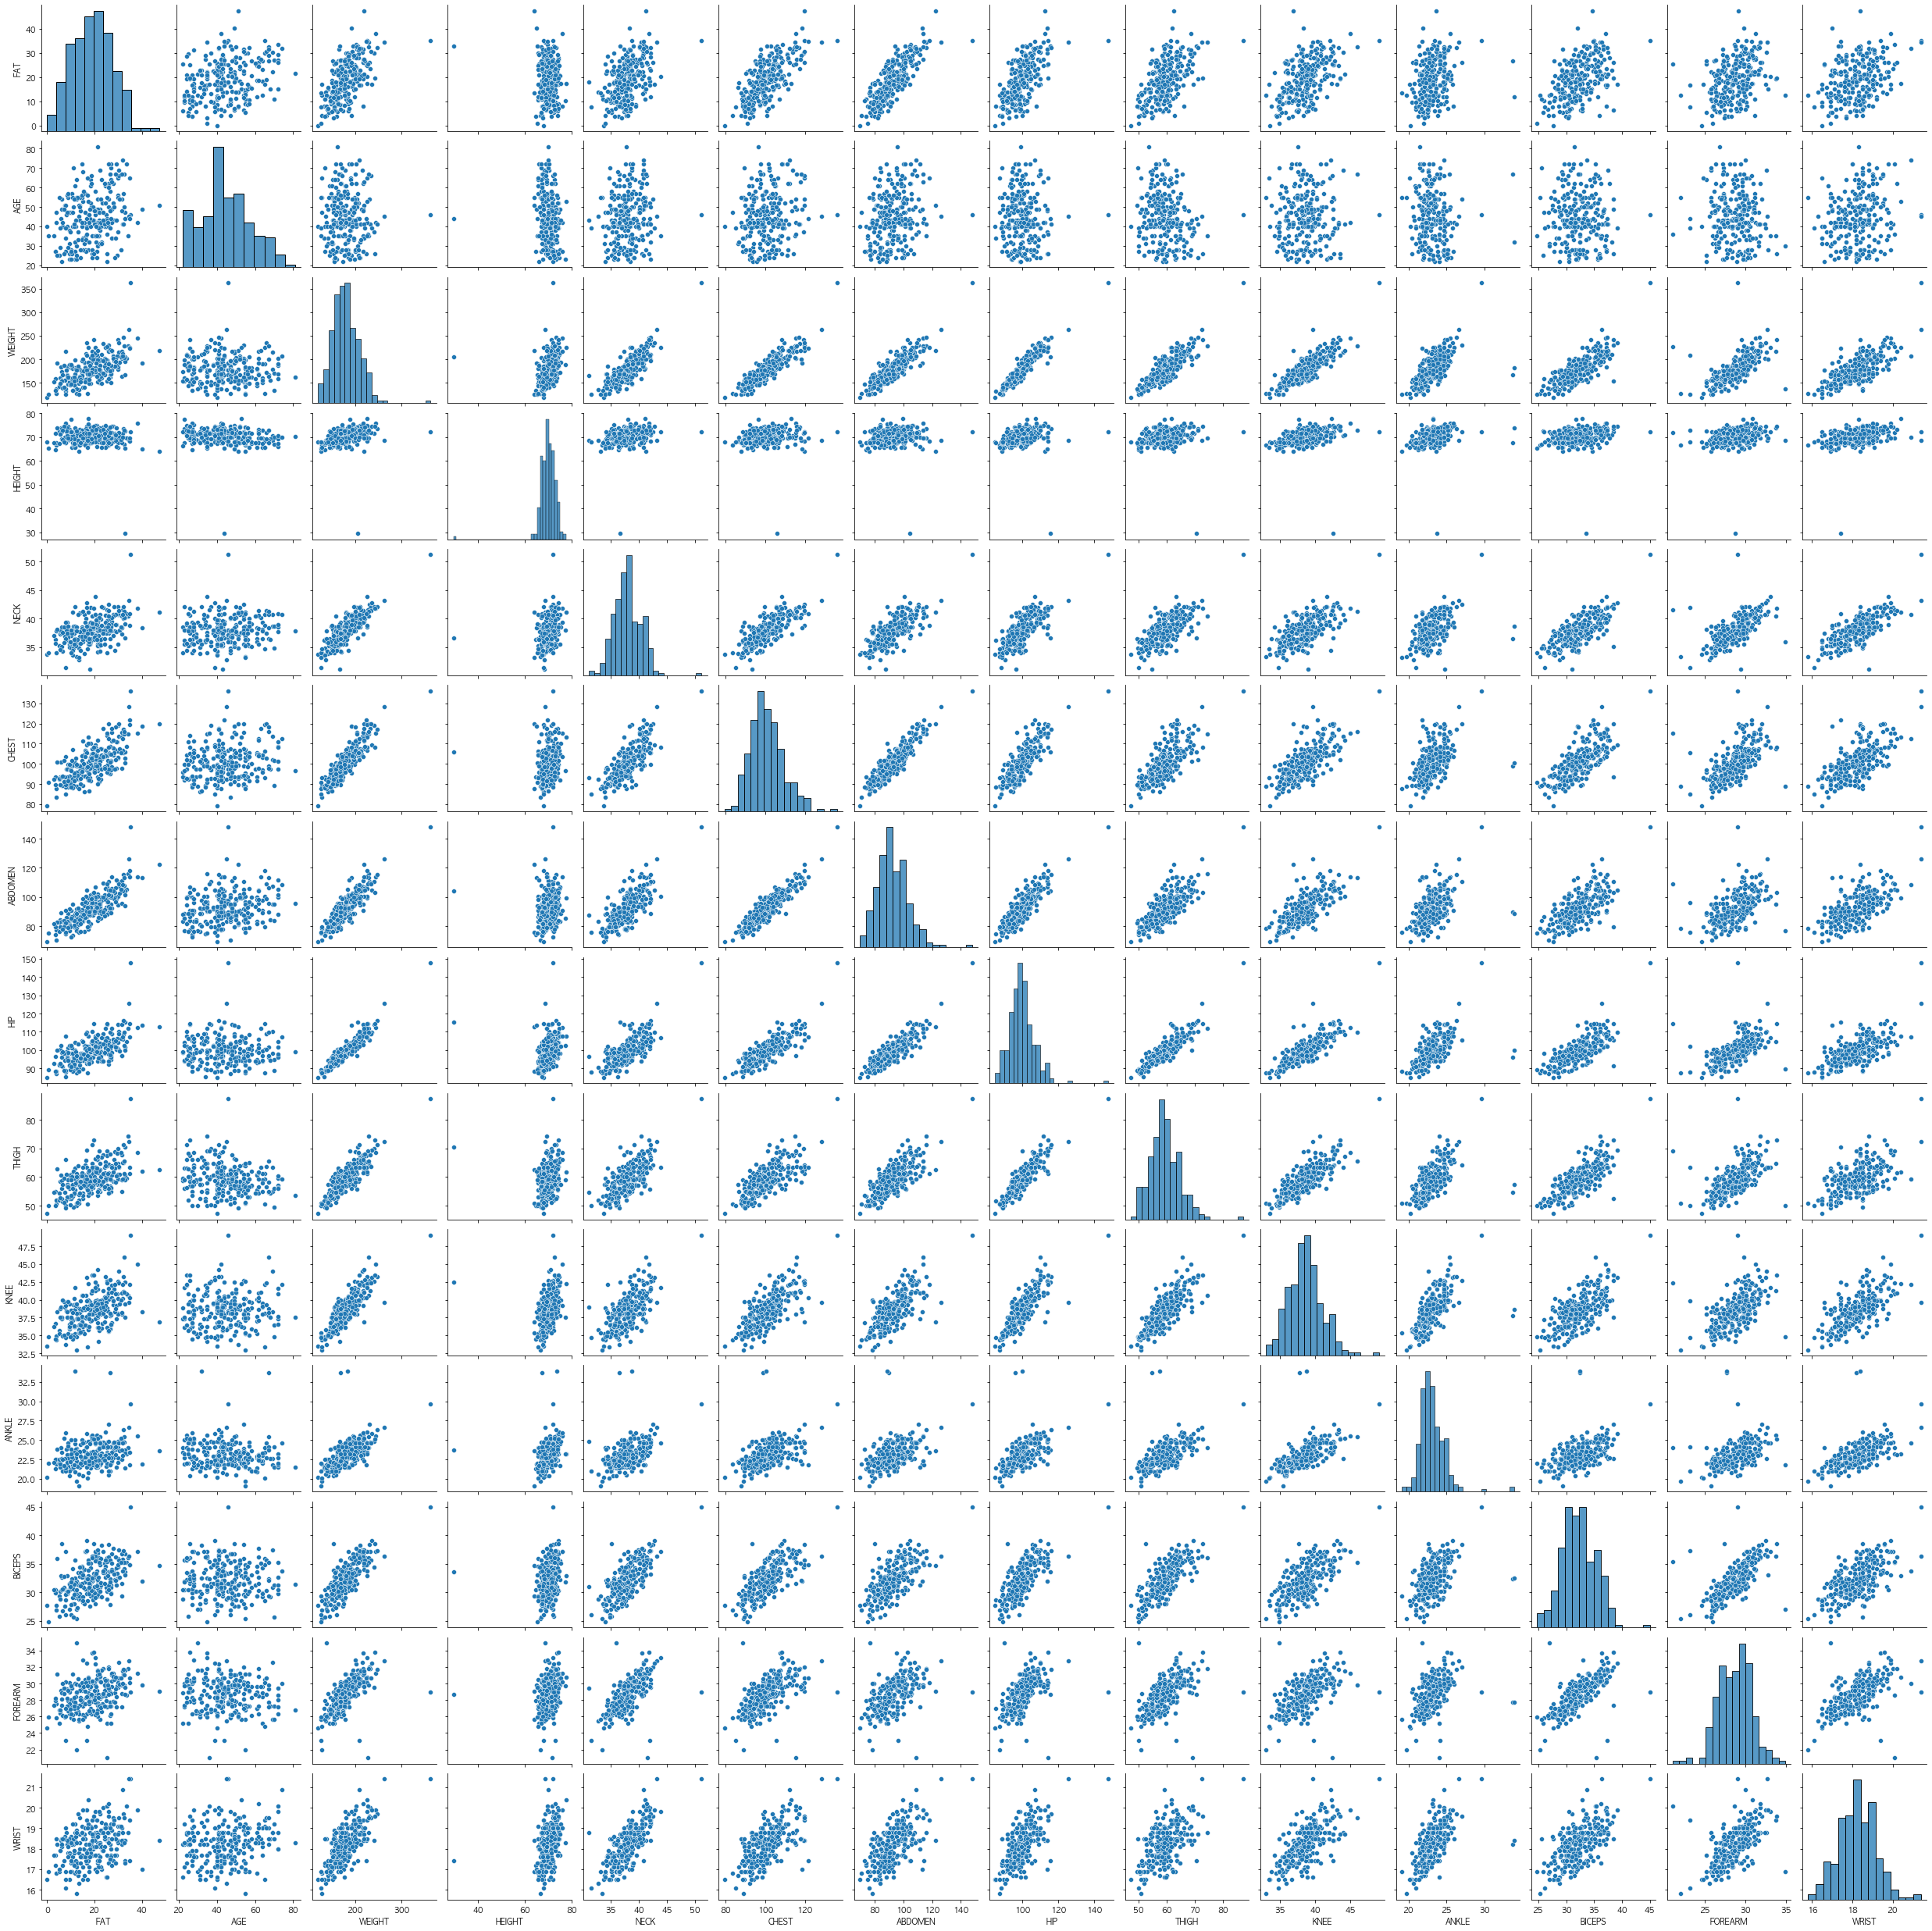

In [5]:
# 산점도 행렬 : 전체 숫자형 변수
sns.pairplot(df_raw)

In [6]:
# 상관관계 분석
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


## 3.회귀모델 생성 : 설명변수 전체

In [7]:
# 선형 회귀분석 : formula(y~X1+X2+X3..)를 이용. 상수항 자동 추가. 코드 중간에서 줄바꿈 \ 추가
reg_model=smf.ols(formula="FAT~AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST",data = df_raw)
# 적합
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Thu, 20 May 2021   Prob (F-statistic):           7.72e-64
Time:                        23:16:13   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

## 4.다중공선성 확인

In [8]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_raw_x=df_raw.drop("FAT",axis=1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
# DataFrame으로 저장
df_vif=pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i)for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


## 5. 다중공선성 재확인

In [9]:
#다중공선성이 높은 변수 제거
df_raw_x=df_raw.drop(["FAT",'WEIGHT'],axis=1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
# DataFrame으로 저장
df_vif=pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i)for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


## 6. 회귀모델생성(다중공선성 제거한 모델)

In [10]:
#선형회귀분석 : formula (y~X1+X2..)이용. 상수항 자동추가 + WEIGHT wprj
reg_model=smf.ols(formula="FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE+ BICEPS+FOREARM+WRIST",data=df_raw)

reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Thu, 20 May 2021   Prob (F-statistic):           3.75e-64
Time:                        23:16:13   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

## 7. 후진제거법을 이용한 변수 선택

In [11]:
# RFE 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
#목표변수 분리
df_raw_y=df_raw["FAT"]
#sklearn의 선형회귀 모델
model=LinearRegression()
# 전체변수 중 5개가 남을 때까지 변수 선택
rfe=RFE(estimator= model,n_features_to_select=5).fit(df_raw_x,df_raw_y)
#선택된 변수
selected_cols=df_raw_x.columns[rfe.support_]
#제거된 변수
removed_cols=df_raw_x.columns[~rfe.support_]

print("Selected Variables :{}".format(selected_cols))
print("Removeed Variables :{}".format(removed_cols))

Selected Variables :Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removeed Variables :Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


## 8. 후진제거법을 이용한 변수 선택 및 모델 생성

In [12]:
#회귀모델 생성
rfe_reg_model=smf.ols(formula="FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST",data=df_raw)
#적합
rfe_reg_result=rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Thu, 20 May 2021   Prob (F-statistic):           4.38e-68
Time:                        23:16:13   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

## 9. 결론 도출

<AxesSubplot:>

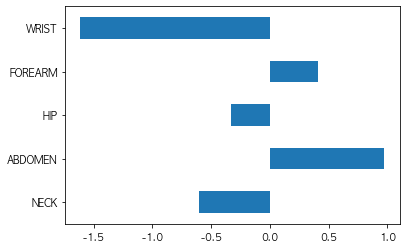

In [13]:
#변수중요도
df_reg_coef=pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]},index=selected_cols)
df_reg_coef.plot.barh(y="Coef",legend=False)

## 10. 표준화 회귀계수를 통한 변수 중요도 확인

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Thu, 20 May 2021   Prob (F-statistic):           4.38e-68
Time:                        23:16:13   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

<AxesSubplot:>

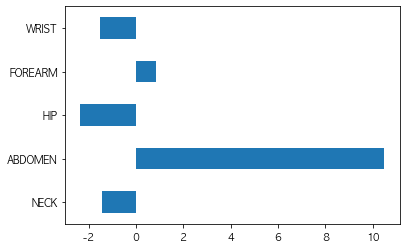

In [14]:
#설명변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler=StandardScaler()
#sclae 변환대상 변수 : 일반적으로 설명변수
cols=df_raw_x.columns
#scale 변환
np_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(np_scaled,columns=cols)

#목표변수 추가
df_scaled["FAT"]=df_raw["FAT"]
reg_model_scaled=smf.ols(formula="FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST",data=df_scaled)
reg_result_scaled=reg_model_scaled.fit()
print(reg_result_scaled.summary())

#설명변수 중요도 (표준화 적용이전)=> 표준화 회귀계수 산출
df_reg_coef=pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]},index=selected_cols)
df_reg_coef.plot.barh(y="Coef",legend=False)